First 10 records:
  Symbol                Security             GICS Sector  \
0    MMM                      3M             Industrials   
1    AOS             A. O. Smith             Industrials   
2    ABT     Abbott Laboratories             Health Care   
3   ABBV                  AbbVie             Health Care   
4    ACN               Accenture  Information Technology   
5   ADBE              Adobe Inc.  Information Technology   
6    AMD  Advanced Micro Devices  Information Technology   
7    AES         AES Corporation               Utilities   
8    AFL                   Aflac              Financials   
9      A    Agilent Technologies             Health Care   

                              GICS Sub-Industry    Headquarters Location  \
0                      Industrial Conglomerates    Saint Paul, Minnesota   
1                             Building Products     Milwaukee, Wisconsin   
2                         Health Care Equipment  North Chicago, Illinois   
3                

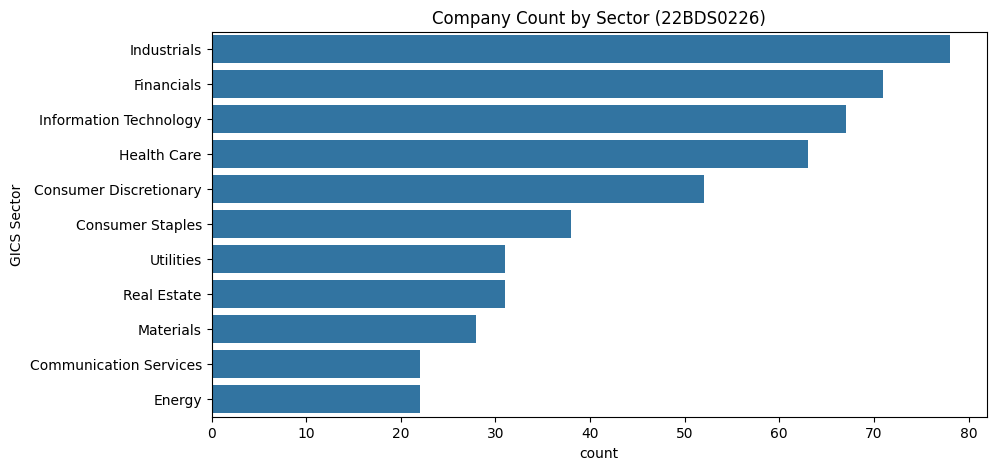

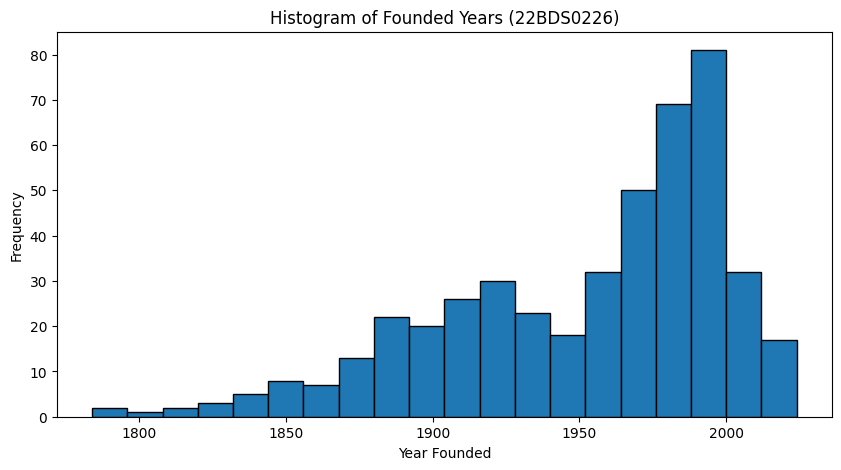

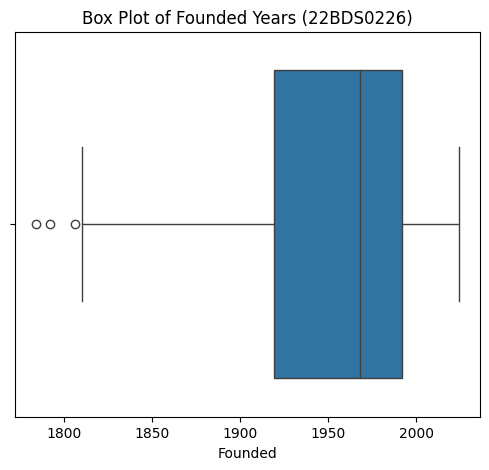

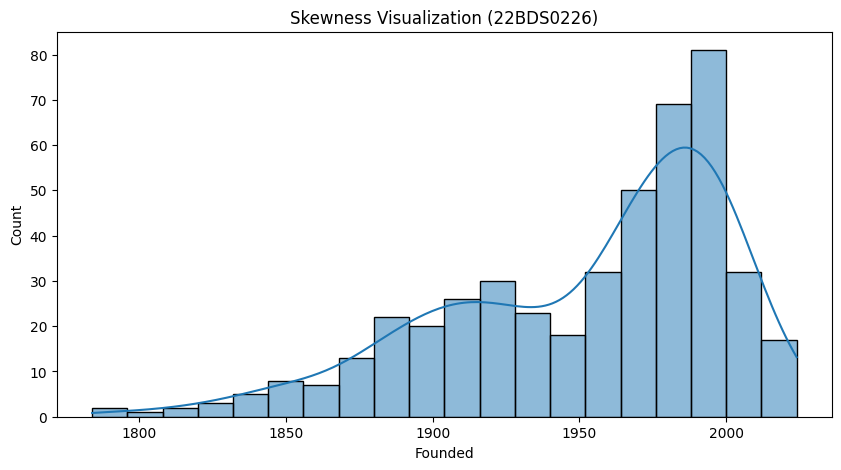

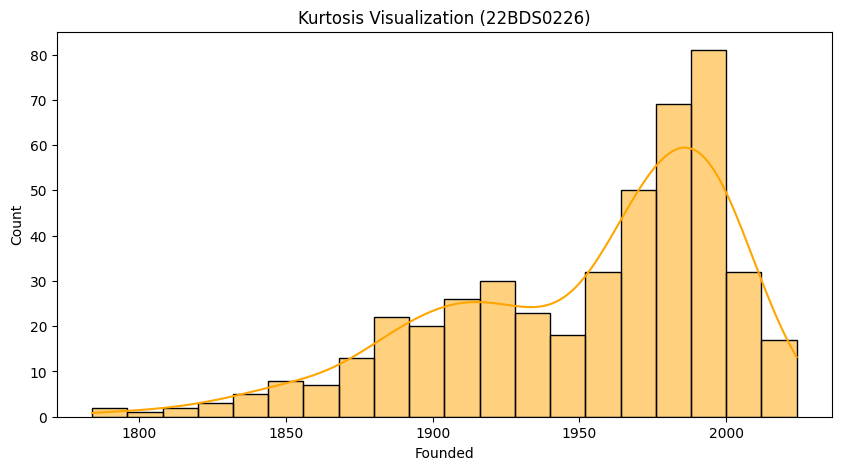

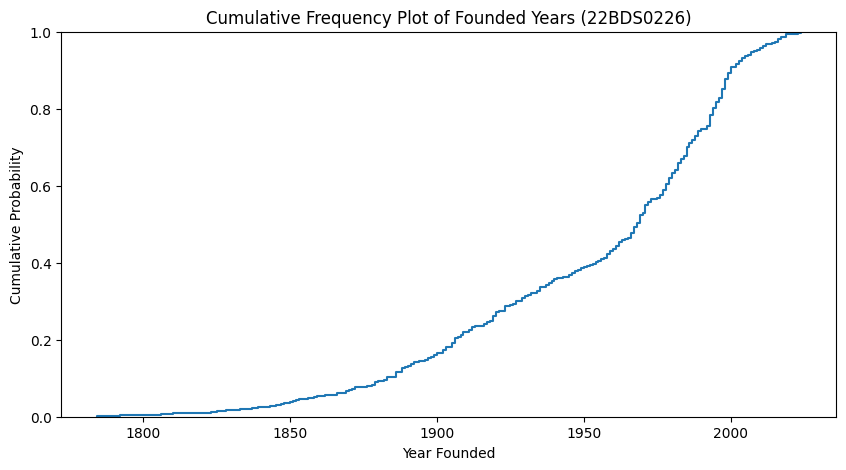

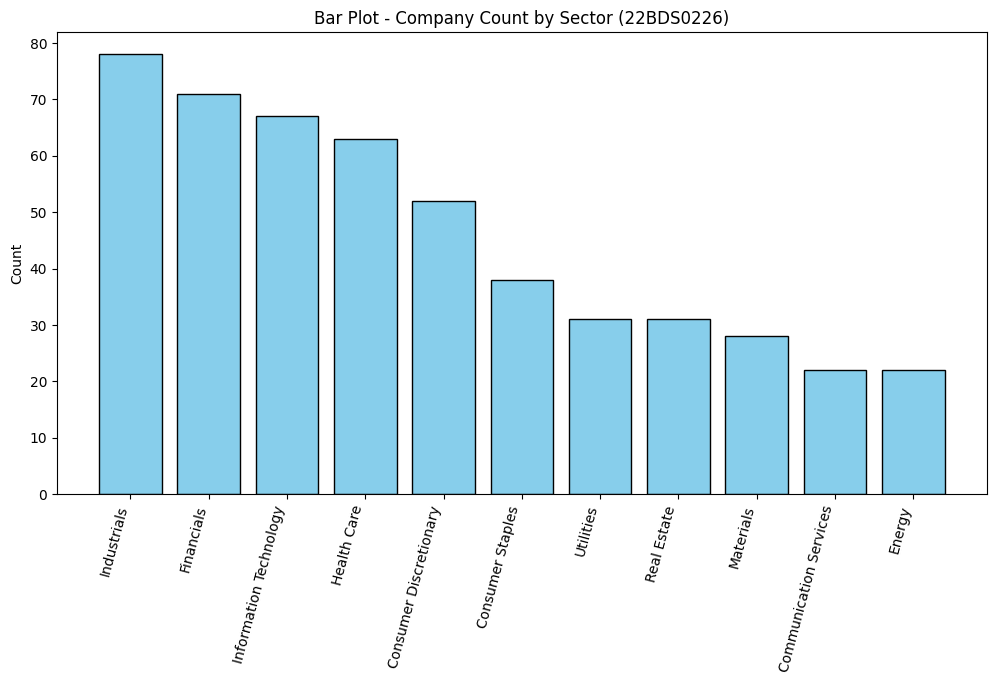

In [12]:
#payal chatterjee
#22BDS0226

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Load dataset directly from URL
url = "https://raw.githubusercontent.com/salemprakash/EDA/main/Data/constituents.csv"
data = pd.read_csv(url)

# Show first 10 records
print("First 10 records:")
print(data.head(10))

#  Dataset info
print("\nDataset Info:")
print(data.info())

# Summary stats
print("\nSummary Statistics:")
print(data.describe(include="all"))

# Missing values
print("\nMissing Values:")
print(data.isnull().sum())

# Convert Founded column to numeric (important for stats)
data["Founded"] = pd.to_numeric(data["Founded"], errors="coerce")
founded_years = data["Founded"].dropna()

# Skewness & Kurtosis
print("\nSkewness of Founded Years:", skew(founded_years))
print("Kurtosis of Founded Years:", kurtosis(founded_years))

#  Plots 

# 1. Bar Plot - Company Count by Sector
plt.figure(figsize=(10,5))
sns.countplot(y="GICS Sector", data=data, order=data["GICS Sector"].value_counts().index)
plt.title("Company Count by Sector (22BDS0226)")
plt.show()
# 2. Histogram with Frequency
plt.figure(figsize=(10,5))
plt.hist(founded_years, bins=20, edgecolor="black")
plt.title("Histogram of Founded Years (22BDS0226)")
plt.xlabel("Year Founded")
plt.ylabel("Frequency")
plt.show()

# 3. Box Plot
plt.figure(figsize=(6,5))
sns.boxplot(x=founded_years)
plt.title("Box Plot of Founded Years (22BDS0226)")
plt.show()

# 4. Skewness Plot (Histogram with KDE)
plt.figure(figsize=(10,5))
sns.histplot(founded_years, kde=True, bins=20)
plt.title("Skewness Visualization (22BDS0226)")
plt.show()

# 5. Kurtosis Plot (Histogram with Heavy Tail Highlight)
plt.figure(figsize=(10,5))
sns.histplot(founded_years, bins=20, kde=True, color="orange")
plt.title("Kurtosis Visualization (22BDS0226)")
plt.show()

# 6. Cumulative Frequency Plot
plt.figure(figsize=(10,5))
sns.ecdfplot(founded_years)
plt.title("Cumulative Frequency Plot of Founded Years (22BDS0226)")
plt.xlabel("Year Founded")
plt.ylabel("Cumulative Probability")
plt.show()

# 7. Bar Plot (Company Count by Sector)
sector_counts = data["GICS Sector"].value_counts()
plt.figure(figsize=(12,6))
plt.bar(sector_counts.index, sector_counts.values, color="skyblue", edgecolor="black")
plt.title("Bar Plot - Company Count by Sector (22BDS0226)")
plt.xticks(rotation=75, ha="right")
plt.ylabel("Count")
plt.show()




C:\Users\alokc\AppData\Local\Programs\Python\Python313\Lib\site-packages\ternary\plotting.py:148: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(xs, ys, vmin=vmin, vmax=vmax, **kwargs)


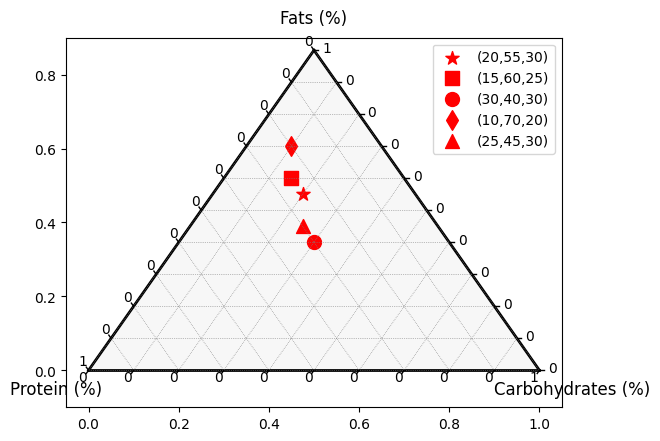

In [5]:
import ternary
import matplotlib.pyplot as plt

# Data: Patient ID, Protein (%), Carbohydrates (%), Fats (%), Symbol
data = [
    (20, 55, 30, "*"),  # Patient 1 (Star)
    (15, 60, 25, "s"),  # Patient 2 (Square for differentiation)
    (30, 40, 30, "o"),  # Patient 3 (Circle)
    (10, 70, 20, "d"),  # Patient 4 (Diamond)
    (25, 45, 30, "^")   # Patient 5 (Triangle)
]

# Normalize Data: Convert percentages to proportions summing to 1
normalized_data = [(p/100, c/100, f/100, symbol) for p, c, f, symbol in data]

# Create a ternary plot
scale = 1  # Since data is already in proportion
figure, tax = ternary.figure(scale=scale)
tax.boundary(linewidth=2.0)  # Draw boundary
tax.gridlines(color="gray", multiple=0.1)  # Gridlines for readability

# Plot points with respective symbols
for p, c, f, symbol in normalized_data:
    tax.scatter([(p, c, f)], marker=symbol, color='red', s=100, label=f"({p*100:.0f},{c*100:.0f},{f*100:.0f})")

# Set Labels
tax.left_corner_label("Protein (%)", fontsize=12)
tax.right_corner_label("Carbohydrates (%)", fontsize=12)
tax.top_corner_label("Fats (%)", fontsize=12)

# Ticks and Styling
tax.ticks(axis='lbr', multiple=0.1, linewidth=1, fontsize=10)
tax.legend()
tax.show()
     